In [72]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [75]:
#Load the data
data = pd.read_csv("credit_risk.csv")
data.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [36]:
data.shape

(32581, 12)

In [37]:
data.isnull().sum()

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

In [38]:
#Replacing Nan values with mean
data["Emp_length"] = data["Emp_length"].fillna(data["Emp_length"].mean())
data["Rate"] = data["Rate"].fillna(data["Rate"].mean())


In [39]:
data.isnull().sum()

Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64

In [40]:
data.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.085333,6322.086646,3.081605,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,11.011695,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [41]:
#Drop 'Id' column
data.drop(columns=["Id"],axis=1, inplace = True)

In [42]:
data.columns

Index(['Age', 'Income', 'Home', 'Emp_length', 'Intent', 'Amount', 'Rate',
       'Status', 'Percent_income', 'Default', 'Cred_length'],
      dtype='object')

In [43]:
data.shape

(32581, 11)

In [44]:
# Check duplicate data
print("Number of duplicates: " + str(data.duplicated().sum()))

Number of duplicates: 165


In [45]:
# Dropping ALL duplicate values
data.drop_duplicates(keep=False,inplace=True)

In [46]:
#number of unique values per column
data.nunique()

Age                 58
Income            4279
Home                 4
Emp_length          37
Intent               6
Amount             753
Rate               349
Status               2
Percent_income      76
Default              2
Cred_length         29
dtype: int64

In [47]:
# Check the unique values and frequency for 'Status'
data['Status'].value_counts()

Status
0    25181
1     7070
Name: count, dtype: int64

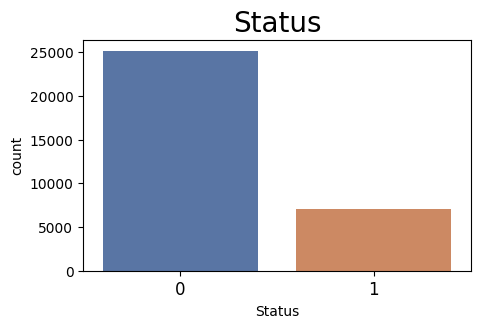

In [48]:
# Status - Target Feature

fig, ax = plt.subplots(figsize=(5, 3))
sns.countplot(x=data["Status"], palette="deep")
plt.title('Status', fontsize = 20)
plt.xticks(fontsize = 12)
plt.show()

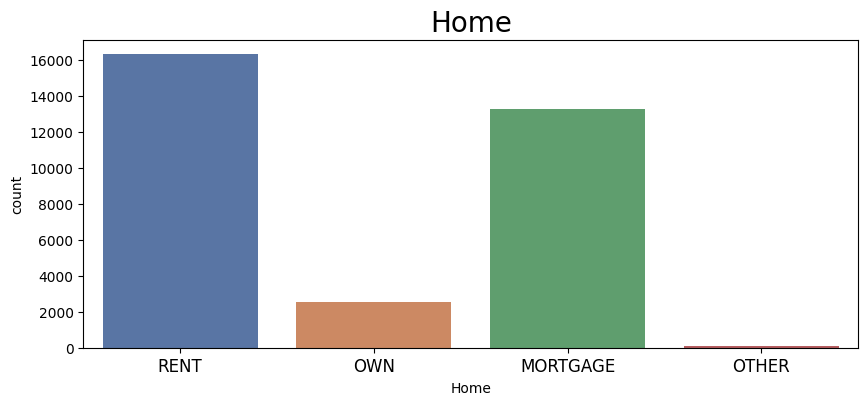

In [49]:
#Home

fig, ax = plt.subplots(figsize=(10, 4))
sns.countplot(x=data["Home"], palette="deep")
plt.title('Home', fontsize = 20)
plt.xticks(fontsize = 12)
plt.show()

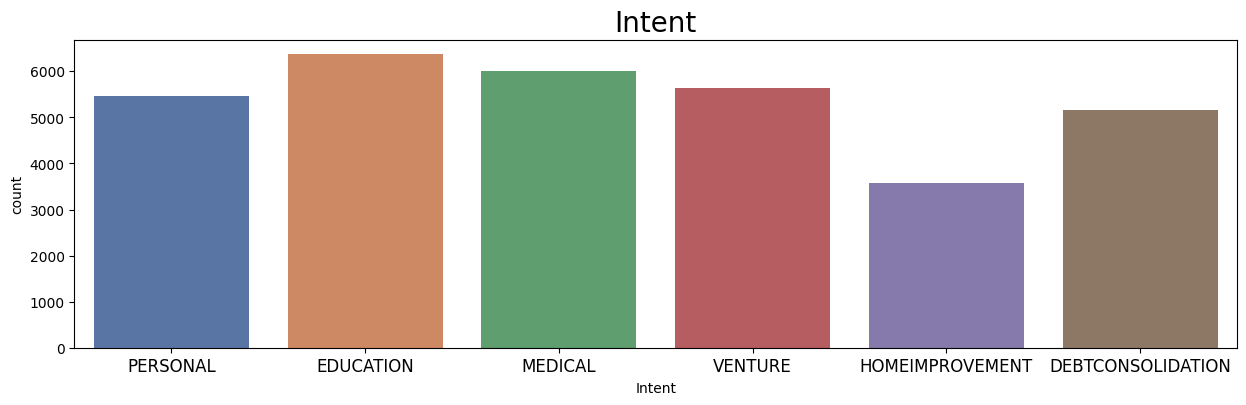

In [50]:
#Intent

fig, ax = plt.subplots(figsize=(15, 4))
sns.countplot(x=data["Intent"], palette="deep")
plt.title('Intent', fontsize = 20)
plt.xticks(fontsize = 12)
plt.show()

In [51]:
data.head()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [52]:
# Instantiate encoder
lb = LabelEncoder()

# Identify object-type columns
objList = data.select_dtypes(include="object").columns

# Iterate through each object-type column and apply label encoding
for obj in objList:
    data[obj] = lb.fit_transform(data[obj].astype(str))


In [53]:
data.head()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,22,59000,3,123.0,4,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,35000,14.27,1,0.55,1,4


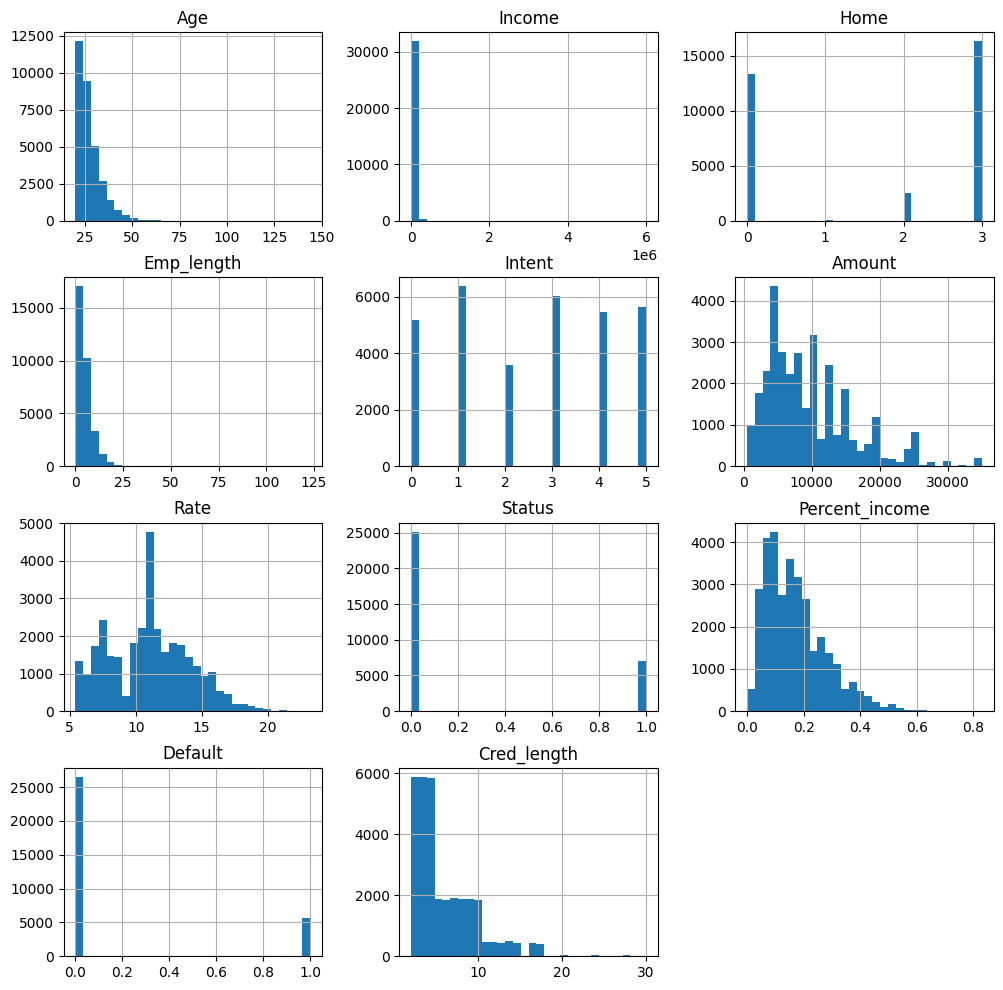

In [54]:
#Histogram
data.hist(figsize=(12,12), bins=30)
plt.show()

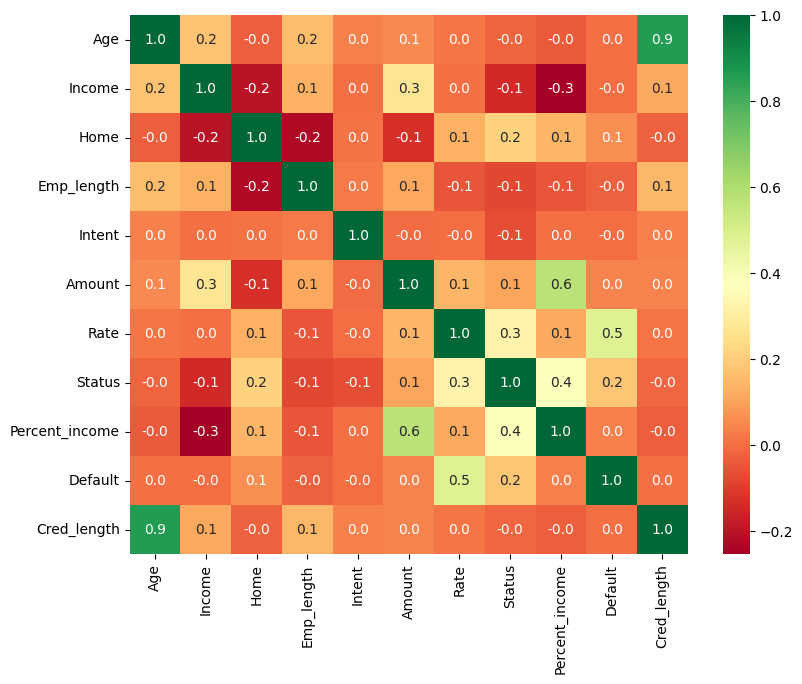

In [55]:
#correaltion matrix and heatmap
correlation_matrix = data.corr()
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', fmt=".1f", ax=ax)
plt.show()

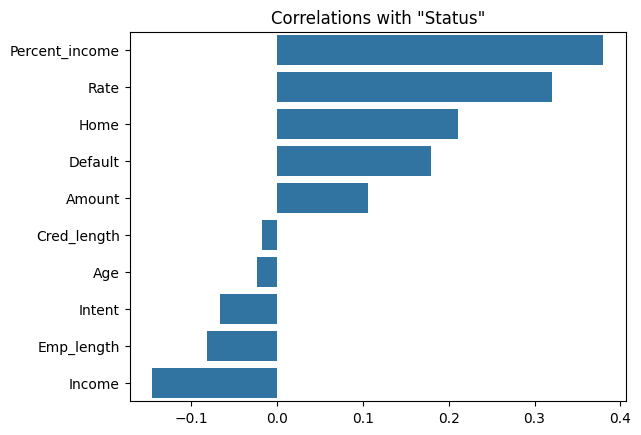

In [56]:
# Correlations with "Status"

# Set correlation limit
limit = -1.0

# Calculate correlations with "Status" and sort them in descending order
data = data.corr()["Status"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>limit:
        labels.append(indices[i])
        corr.append(data[i])
sns.barplot(x=corr, y=labels)
plt.title('Correlations with "Status"')
plt.show()

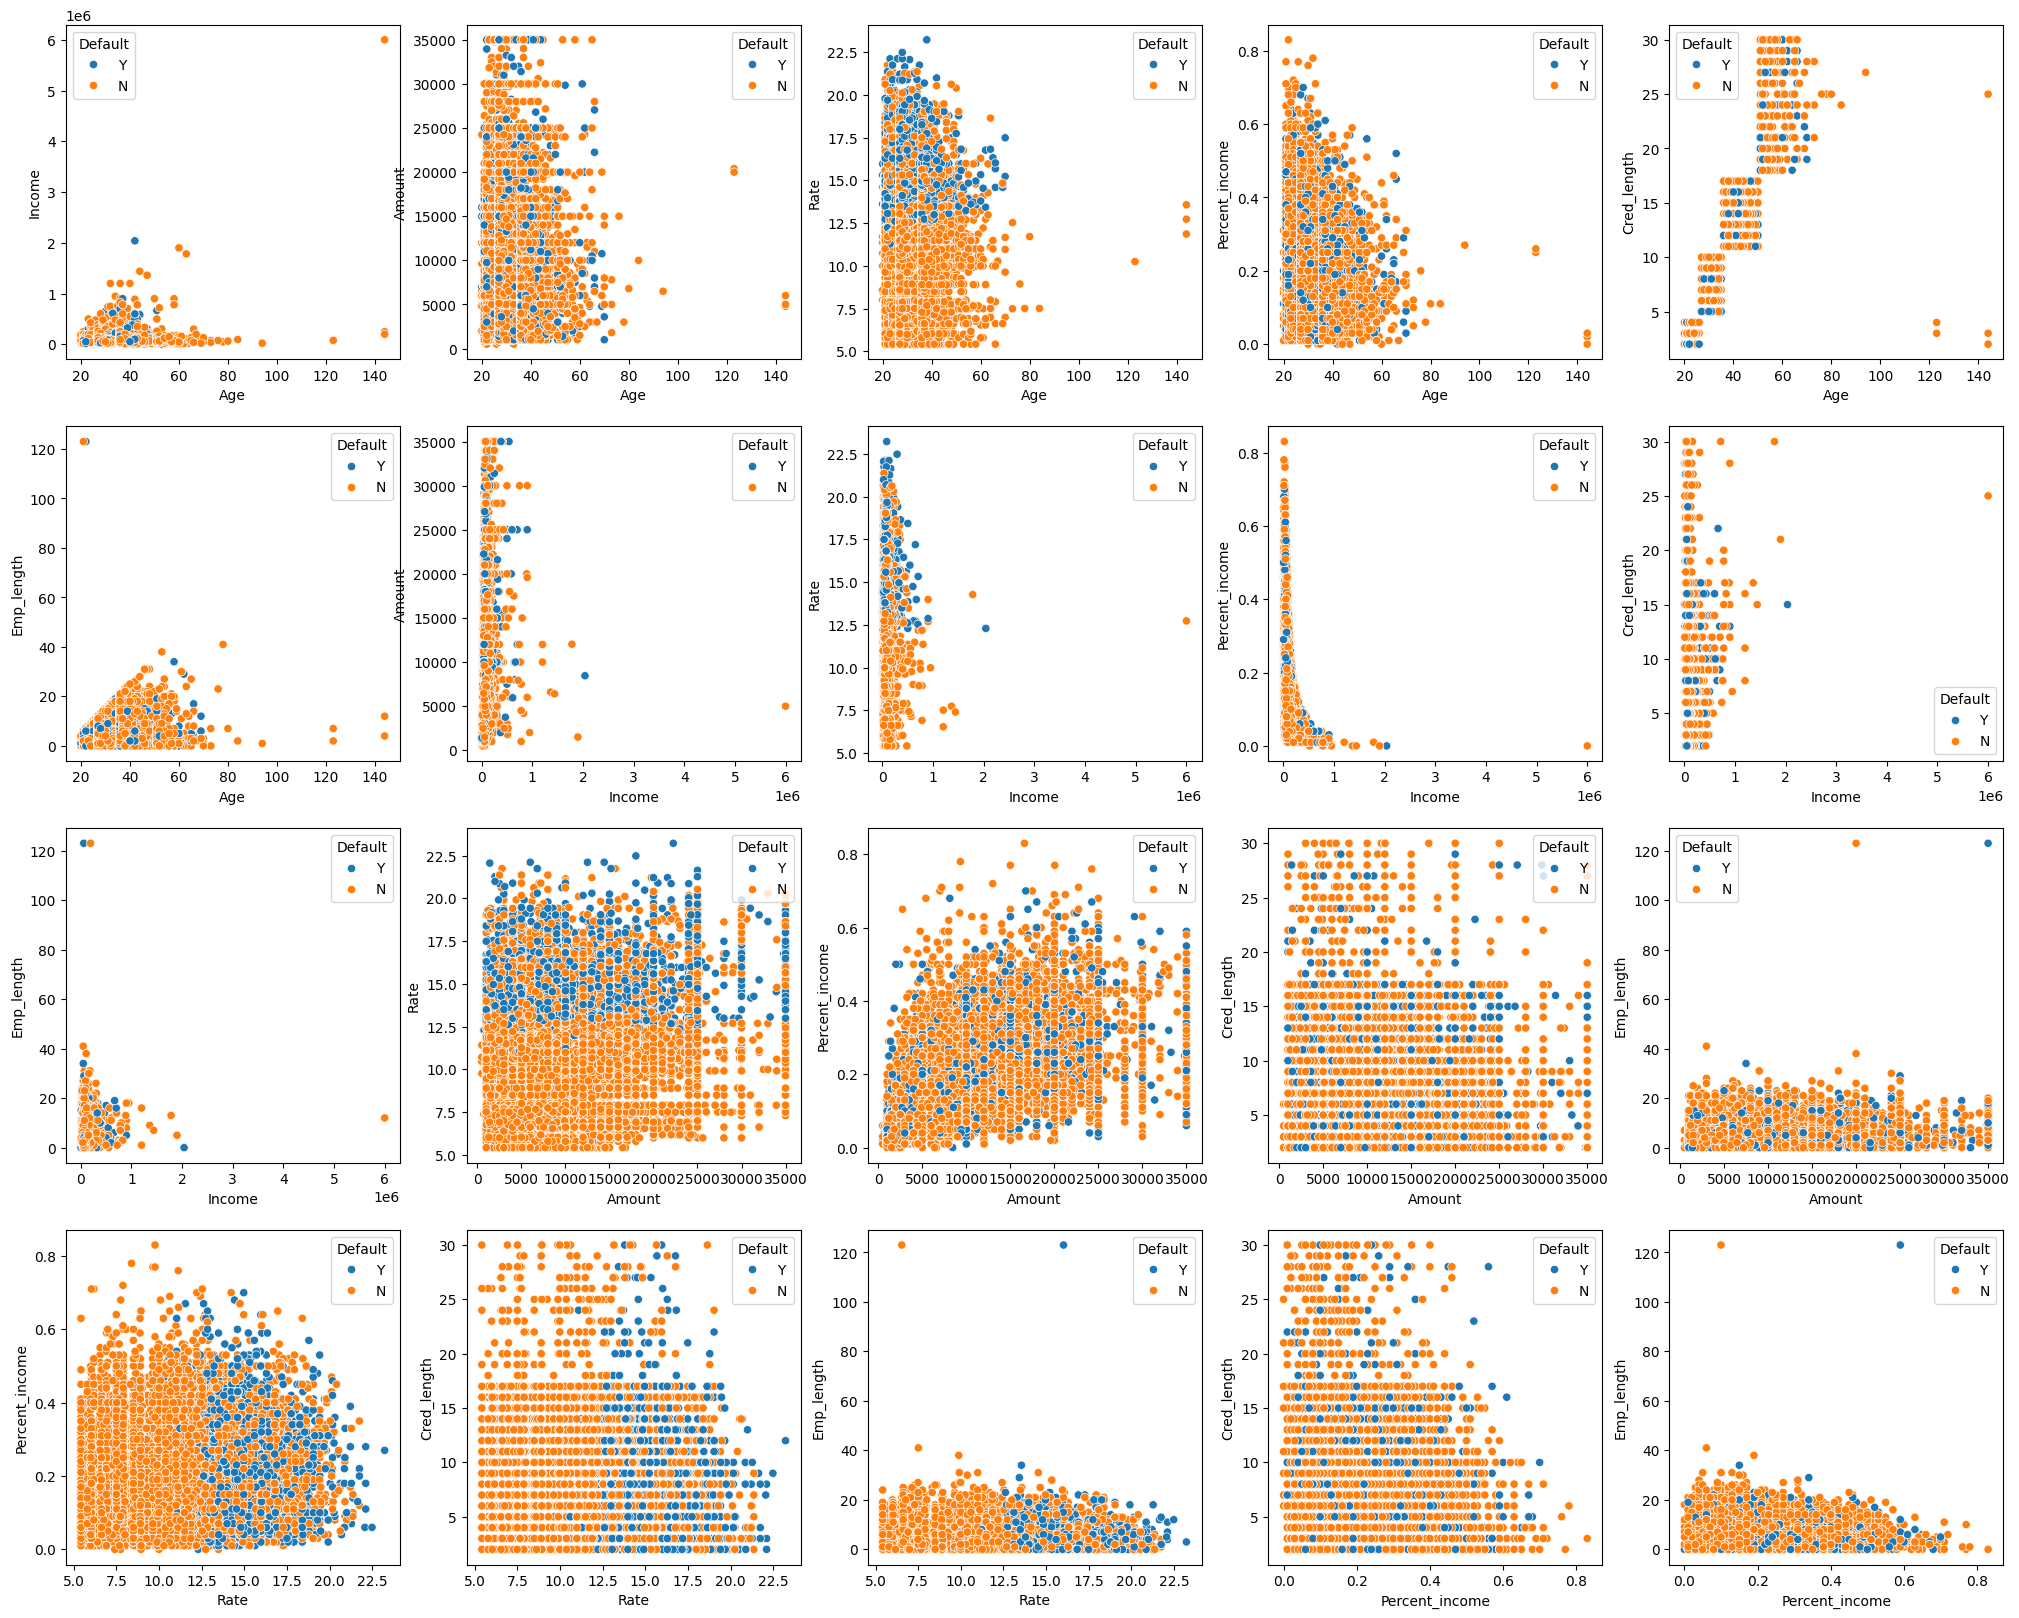

In [83]:
fig, axes = plt.subplots(4, 5, figsize = (25, 20))

sns.scatterplot(ax = axes[0,0], x = 'Age', y = 'Income', data = data, hue = 'Default')
sns.scatterplot(ax = axes[0,1], x = 'Age', y = 'Amount', data = data, hue = 'Default')
sns.scatterplot(ax = axes[0,2], x = 'Age', y = 'Rate', data = data, hue = 'Default')
sns.scatterplot(ax = axes[0,3], x = 'Age', y = 'Percent_income', data = data, hue = 'Default')
sns.scatterplot(ax = axes[0,4], x = 'Age', y = 'Cred_length', data = data, hue = 'Default')
sns.scatterplot(ax = axes[1,0], x = 'Age', y = 'Emp_length', data = data, hue = 'Default')
sns.scatterplot(ax = axes[1,1], x = 'Income', y = 'Amount', data = data, hue = 'Default')
sns.scatterplot(ax = axes[1,2], x = 'Income', y = 'Rate', data = data, hue = 'Default')
sns.scatterplot(ax = axes[1,3], x = 'Income', y = 'Percent_income', data = data, hue = 'Default')
sns.scatterplot(ax = axes[1,4], x = 'Income', y = 'Cred_length', data = data, hue = 'Default')
sns.scatterplot(ax = axes[2,0], x = 'Income', y = 'Emp_length', data = data, hue = 'Default')
sns.scatterplot(ax = axes[2,1], x = 'Amount', y = 'Rate', data = data, hue = 'Default')
sns.scatterplot(ax = axes[2,2], x = 'Amount', y = 'Percent_income', data = data, hue = 'Default')
sns.scatterplot(ax = axes[2,3], x = 'Amount', y = 'Cred_length', data = data, hue = 'Default')
sns.scatterplot(ax = axes[2,4], x = 'Amount', y = 'Emp_length', data = data, hue = 'Default')
sns.scatterplot(ax = axes[3,0], x = 'Rate', y = 'Percent_income', data = data, hue = 'Default')
sns.scatterplot(ax = axes[3,1], x = 'Rate', y = 'Cred_length', data = data, hue = 'Default')
sns.scatterplot(ax = axes[3,2], x = 'Rate', y = 'Emp_length', data = data, hue = 'Default')
sns.scatterplot(ax = axes[3,3], x = 'Percent_income', y = 'Cred_length', data = data, hue = 'Default')
sns.scatterplot(ax = axes[3,4], x = 'Percent_income', y = 'Emp_length', data = data, hue = 'Default')
plt.show()